<a href="https://colab.research.google.com/github/Prashantijamgondi/Prashantijamgondi/blob/main/DigitDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIGIT RECOGNIZER using pandas, numpy and matplotlib.

# Imports

In [ ]:
import pandas as pd

# Data Collection

### Downloading MNIST Train and Test Datasets  

In [ ]:
# Downloading the datasets using wget
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_mnist/train.csv
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_mnist/test.csv

--2024-11-27 06:03:19--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_mnist/train.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 3.5.210.186, 3.5.213.10, 3.5.213.187, ...
Connecting to nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)|3.5.210.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76775041 (73M) [text/csv]
Saving to: ‘train.csv’

train.csv           100%[===================>]  73.22M  15.0MB/s    in 6.3s    

2024-11-27 06:03:26 (11.6 MB/s) - ‘train.csv’ saved [76775041/76775041]

--2024-11-27 06:03:26--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_mnist/test.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-sou

# Understanding the Data

## Loading Data

Loading the data from a csv file into python

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

### Example of Data, How the CSV file containes Values

In [ ]:
#Example of Data, How the CSV file containes Values
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open('Untitled.png')
image = image.resize((28, 28))

image = image.convert('L')  # Use 'L' for grayscale conversion

image_array = np.array(image)

# Flatten the array into a single row
flattened_array = image_array.flatten()
flattened_array


FileNotFoundError: [Errno 2] No such file or directory: '/content/Untitled.png'

## Dataframe
**A dataframe is like a dictionary of lists, but with much more functionality**

*   A table of data (Rows and Columns)
*   2 Dimensional Data Structure


In [ ]:
type(train_df)

pandas.core.frame.DataFrame

**Creating a dataframe**

In [ ]:
people = {
    "name": ['Alfred', 'Jim', 'Mary', 'Jenny'],
    "age": [5, 6, 6, 7]
}

df = pd.DataFrame(people)
df

,name,age
0,Alfred,5
1,Jim,6
2,Mary,6
3,Jenny,7


## Properties of a Dataframe

**Shape of a dataframe**



In [ ]:
train_df.shape

(42000, 785)

**`df.dtypes` returns the datatypes of each column in a DataFrame**


In [ ]:
train_df.dtypes

,0
label,int64
pixel0,int64
pixel1,int64
pixel2,int64
pixel3,int64
...,...
pixel779,int64
pixel780,int64
pixel781,int64
pixel782,int64


**`df.columns` returns the column labels of a DataFrame**


In [ ]:
train_df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

**`df.value_counts`** returns a Series containing counts of unique values.
* Can use to check whether the dataset is **balanced or imbalanced**

In [ ]:
train_df["label"].value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


### df.head
* `df.head(n=10)`
  *   Returns the first `n` rows.
  * For negative values of `n`, this function returns all the rows except for the last `n` rows.


In [ ]:
train_df.head(n = 10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### df.tail
* `df.tail(n=10)`
  *   Returns the last `n` rows.
  * For negative values of `n`, this function returns all rows except for the first `n` rows.

In [ ]:
train_df.tail(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### df.info
* `df.info()`
  * Print a concise summary of a DataFrame including the dtypes of the columns, memory usage, etc.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


### df.describe
* `df.describe()`
  * Generates descriptive statistics.

In [ ]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Series
**A Series is like a list of data, but with much more functionality**


Creating Series from a List of Data

In [ ]:
pd.Series([1, 2, 3, 4, "asdf"])

,0
0,1
1,2
2,3
3,4
4,asdf


In [ ]:
type(train_df['label'])

pandas.core.series.Series

## Accessing Data

### df.loc

**Accessing by label / name**


In [ ]:
train_df.loc[355]

,355
label,2
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [ ]:
train_df.loc[355:360,['label']]

,label
355,2
356,9
357,0
358,7
359,7
360,2


### df.iloc

**Accessing by position numbers**

* `df.iloc()`

  * Purely integer-location based indexing for selection by position.
  * Unlike in `loc`, if a slice object with indices is passed, then **stop index is excluded**

In [ ]:
train_df.iloc[355, 0]

2

In [ ]:
train_df.iloc[355:360, [240, 246]]

,pixel239,pixel245
355,0,117
356,253,253
357,106,252
358,209,0
359,253,0


### df.at
* `df.at()`
  * Access a single value for a row/column label pair.
  * Can also set/update a value at a specified row/column pair
  * Use `at` only if you need to get or set a single value in a DataFrame or Series.


In [ ]:
train_df.at[355, 'label']

2

# Data Preprocessing

## Handling missing values

### pd.DataFrame.isna
* `pd.DataFrame.isna()`
  * Return a boolean same-sized object indicating if the values are NA.
  * `None` is considered as NA value.

In [ ]:
people = {
    "name": ['Alfred', 'Jim', 'Jenny'],
    "age": [5, 6, None]
}

df = pd.DataFrame(people)
df

,name,age
0,Alfred,5.0
1,Jim,6.0
2,Jenny,NaN


In [ ]:
df.isna()

,name,age
0,False,False
1,False,False
2,False,True


In [ ]:
train_df.isna()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**To find the number of `None` objects**

In [ ]:
df.isna().sum()

,0
name,0
age,1


In [ ]:
train_df.isna().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


### pd.DataFrame.dropna

* `pd.DataFrame.dropna()`
  * Removes missing values
  * Returns a DataFrame with the NA entries dropped from it.

In [ ]:
df

,name,age
0,Alfred,5.0
1,Jim,6.0
2,Jenny,NaN


In [ ]:
df.dropna(inplace=True)
df

,name,age
0,Alfred,5.0
1,Jim,6.0


In [ ]:
train_df.dropna(inplace=True)
train_df.shape

(42000, 785)

## Handling duplicates

### pd.DataFrame.duplicated
* `pd.DataFrame.duplicated()`
  * It returns a boolean series for each of the duplicated rows.
   

In [ ]:
people = {
    "name": ['Alfred', 'Jim', 'Jim', 'Jenny'],
    "age": [5, 6, 6, 6]
}

df = pd.DataFrame(people)
df

,name,age
0,Alfred,5
1,Jim,6
2,Jim,6
3,Jenny,6


In [ ]:
df.duplicated()

,0
0,False
1,False
2,True
3,False


In [ ]:
df[df.duplicated()]

,name,age
2,Jim,6


In [ ]:
train_df[train_df.duplicated()]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783


### pd.DataFrame.drop_duplicates
* `pd.drop_duplicates()`
  * It returns a dataframe with the duplicated rows removed.
  

In [ ]:
df

,name,age
0,Alfred,5
1,Jim,6
2,Jim,6
3,Jenny,6


In [ ]:
df.drop_duplicates(inplace=True)
df

,name,age
0,Alfred,5
1,Jim,6
3,Jenny,6


In [ ]:
train_df.drop_duplicates(inplace=True)

# MNIST Data

### `Data` as Inputs and Outputs

* Inputs are represented as a Design Matrix $X$.
* Output vector is represented as $Y$.  

Outputs are also called as target labels. In case of MNIST dataset, the labels are {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

#### pd.DataFrame.drop
* `pd.DataFrame.drop(labels=None, axis=0, index=None, columns=None, inplace=False)`
  * `labels` is the index or column labels to drop.
  *  `axis` specifies the axis to drop the labels from.
  * `index` is an alternative to specifying the axis (labels, axis=0 is equivalent to index=labels)
  * `columns` is an alternative to specifying the axis (labels, axis=1 is equivalent to columns=labels).
  * `inplace`: If False, returns a copy. Otherwise, do operation inplace and return `None` (default `False`)


In [ ]:
train_df.drop(columns=['label'])

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### pd.DataFrame.pop
Returns a column and drops it from dataframe

In [ ]:
label_target = train_df.pop('label')
label_target

,label
0,1
1,0
2,1
3,4
4,0
...,...
41995,0
41996,1
41997,7
41998,6


In [ ]:
train_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Test Inputs

In [ ]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualizing the image from an input vector

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualise(image_df):
    image_1D = image_df.to_numpy()
    image_2D = image_1D.reshape((28, 28))
    plt.imshow(image_2D, cmap=plt.get_cmap('gray'))
    plt.show()

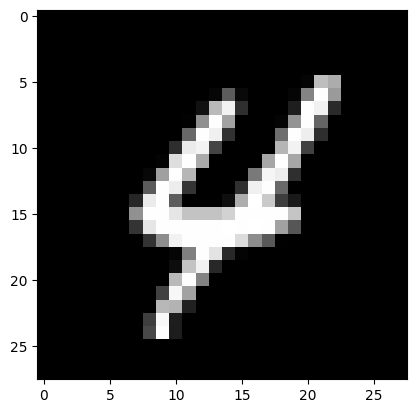

 
Given Digit is 4


In [ ]:
visualise(train_df.loc[4700])

print(' ')
print("Given Digit is ", end="")
print(label_target[4700])

# Example of Kannada Digits To Recognisation

In [ ]:
from google.colab import files

uploaded = files.upload()
path_to_image=uploaded

KeyboardInterrupt: 

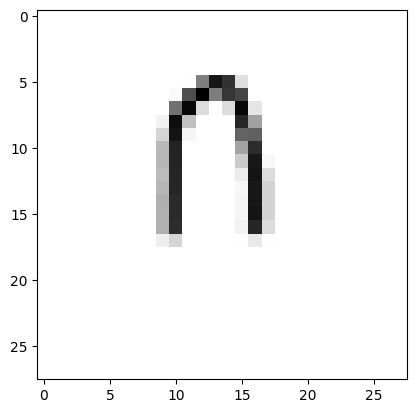

Length of Flattened Array: 784
Given Digit is 1
Given Digit is 1


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open('Untitled.png')
image = image.resize((28, 28))

image = image.convert('L')  # Use 'L' for grayscale conversion

image_array = np.array(image)

flattened_array = image_array.flatten()

# Visualize the image
def visualize(image_array):
    plt.imshow(image_array.reshape((28, 28)), cmap='gray')
    plt.axis()
    plt.show()

visualize(image_array)

label = 1 # for short time

print("Length of Flattened Array:", len(flattened_array))
print(f"Given Digit is {label}")

print("Given Digit is ", end="")

print(label_target[255])

In [ ]:
lists=list(flattened_array)
for i in flattened_array:
    if(i!=255):
      print(lists.index(i), i)

151 254
152 168
153 97
154 116
155 233
178 251
179 136
180 82
181 167
182 119
183 129
206 159
207 87
208 231
210 232
211 88
212 237
233 246
234 91
235 212
239 109
240 192
261 226
262 96
263 248
267 150
268 147
289 207
290 106
295 193
296 113
317 206
318 107
323 219
324 98
325 250
345 209
346 108
351 242
352 95
208 231
317 206
346 108
379 249
324 98
381 225
401 201
402 111
263 248
324 98
381 225
429 202
402 111
263 248
262 96
381 225
429 202
458 112
233 246
346 108
208 231
485 243
261 226
151 254
492 240
493 253
